<a href="https://colab.research.google.com/github/bermudezcc/Bermudez3/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Elaboro**:

Cristian Camilo Bermúdez Salcedo


In [ ]:
from scipy.stats import shapiro
import mpl_toolkits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import sample
import random as rd
import scipy as sc
import folium
from matplotlib.lines import Line2D
from folium.map import Popup
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import plotly.express as px
from scipy.spatial import distance_matrix
from statsmodels.formula.api import ols

1- Convertir el código R en Python para generar un data.frame de manera análoga.

In [ ]:
rd.seed(1005715266)
seqlat = np.arange(-73.30, -73.25, 0.001)
seqlong = np.arange(5.54, 5.58, 0.001)
latitude = np.random.choice(seqlat, size=100, replace=True)
longitude = np.random.choice(seqlong, size=100, replace=True)
print(latitude)

[-73.295 -73.286 -73.297 -73.281 -73.269 -73.267 -73.254 -73.262 -73.253
 -73.275 -73.269 -73.271 -73.259 -73.287 -73.286 -73.295 -73.257 -73.294
 -73.264 -73.275 -73.282 -73.283 -73.268 -73.292 -73.293 -73.266 -73.284
 -73.252 -73.251 -73.267 -73.272 -73.265 -73.277 -73.265 -73.278 -73.276
 -73.288 -73.263 -73.29  -73.292 -73.283 -73.263 -73.282 -73.281 -73.252
 -73.255 -73.268 -73.256 -73.282 -73.27  -73.285 -73.255 -73.252 -73.29
 -73.252 -73.293 -73.27  -73.298 -73.262 -73.293 -73.263 -73.288 -73.272
 -73.288 -73.279 -73.293 -73.275 -73.265 -73.282 -73.276 -73.276 -73.265
 -73.26  -73.295 -73.282 -73.259 -73.26  -73.255 -73.276 -73.265 -73.274
 -73.272 -73.272 -73.297 -73.28  -73.271 -73.269 -73.264 -73.252 -73.282
 -73.26  -73.271 -73.273 -73.263 -73.293 -73.265 -73.27  -73.261 -73.27
 -73.297]


        x       y
0   5.558 -73.295
1   5.559 -73.286
2   5.549 -73.297
3   5.563 -73.281
4   5.573 -73.269
..    ...     ...
95  5.553 -73.265
96  5.556 -73.270
97  5.568 -73.261
98  5.550 -73.270
99  5.569 -73.297

[100 rows x 2 columns]


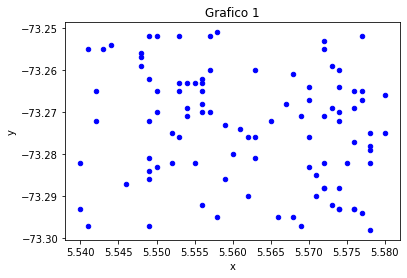

In [ ]:
data = {
  "x": longitude,
  "y": latitude
}
xy = pd.DataFrame(data)
print(xy)
xy.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'blue')

plt.title('Grafico 1')
plt.show()

In [ ]:
SMI = np.partition(np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition(np.random.uniform(0.45,0.06,100), 10)
LST = np.partition(26* sc.stats.beta.rvs(0.87,0.91, size=100), 10)

In [ ]:
data2 = {
  "x": xy['x'],
  "y": xy['y'],
  "SMI": SMI,
  "NDVI": NDVI,
  "LST": LST
}
df1 = pd.DataFrame(data2)
print(df1)

        x       y       SMI      NDVI        LST
0   5.558 -73.295  0.705656  0.064150   1.981066
1   5.559 -73.286  0.705222  0.067243   0.129163
2   5.549 -73.297  0.701797  0.084070   0.396746
3   5.563 -73.281  0.702120  0.082395   0.815513
4   5.573 -73.269  0.703025  0.065328   2.089660
..    ...     ...       ...       ...        ...
95  5.553 -73.265  0.882888  0.444911  23.847986
96  5.556 -73.270  0.862766  0.349083  25.268116
97  5.568 -73.261  0.915285  0.406403  25.615474
98  5.550 -73.270  0.775435  0.188901  24.559976
99  5.569 -73.297  0.809154  0.211425  25.190116

[100 rows x 5 columns]


2- Graficar la nube de puntos (solo coordenadas).

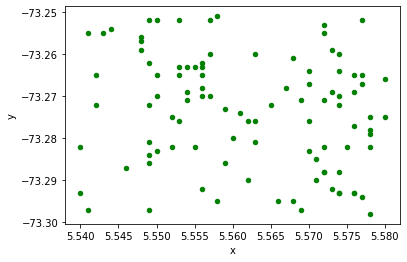

In [ ]:
df1.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'green'
         )
plt.show()

3- Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar).

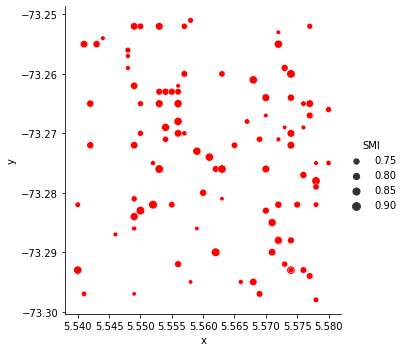

In [ ]:
sns.relplot(x="x",
            y="y", 
            size = "SMI",
            color= 'red', 
            data = df1)
plt.show()

4- Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)

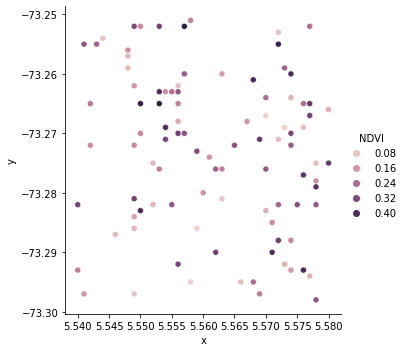

In [ ]:
sns.relplot(data = df1,
                 x="x",
            y="y", 
            hue = "NDVI",
            )
plt.show()

5- Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)

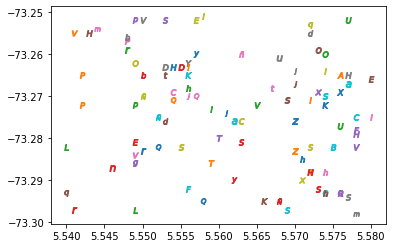

In [ ]:
chars = "AaBbCcDdEeFfGgHhIiJjKkLlMmNnÑñOoPpqQRrSsTtUuVvXxYyZz"
form = []
for j in range(100):
  form.append('$'+rd.choice(chars)+'$')
for i in range(len(df1['LST'])):
  plt.scatter(df1['x'][i], 
              df1['y'][i],
              marker=form[i])
plt.show()

6- Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar.

In [ ]:
Map = folium.Map(location= [5.560000000000007, -73.27499999999988],zoom_start=14)
for i in range(len(df1['x'])):
  folium.Marker(
      location= [df1['x'][i],df1['y'][i]],
      popup=f"x:{df1['x'][i]}, y:{df1['y'][i]}" ,
      icon= folium.Icon()
      ).add_to(Map) 
Map


7- Realice un boxplot para SMI

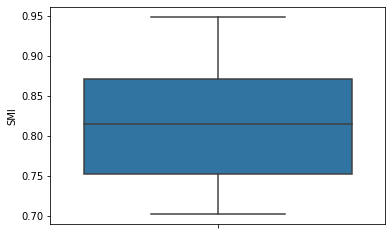

In [ ]:
sns.boxplot(data = df1, y = 'SMI')

8- Realice un histograma para NDVI

Text(0, 0.5, 'Frecuencia')

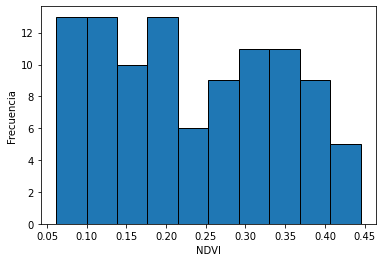

In [ ]:
 plt.hist(df1['NDVI'], 
         ec= "black")
plt.xlabel('NDVI',fontsize=10)
plt.ylabel('Frecuencia',fontsize=10)

9- Grafique la densidad para LST

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



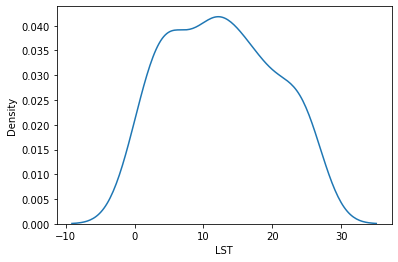

In [ ]:
sns.distplot(df1['LST'],hist=False)
plt.show()

10- Calcule estadísticas descriptivas para las 3 variables

In [ ]:
df1[{'SMI', 'NDVI', 'LST'}].describe()

,NDVI,LST,SMI
count,100.000000,100.000000,100.000000
mean,0.235817,12.522543,0.815940
std,0.110464,7.599867,0.073029
min,0.061499,0.001051,0.701797
25%,0.133236,5.737619,0.752882
50%,0.227884,11.898367,0.814713
75%,0.331173,18.813169,0.870687
max,0.444911,25.978947,0.948712


11- Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

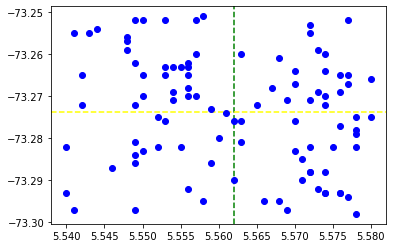

In [ ]:
lonmedia = np.mean(xy['x'])
latmedia = np.mean(xy['y'])
plt.axvline(x=lonmedia, color="green", linestyle="--")
plt.axhline(y=latmedia, color="yellow", linestyle="--")
plt.plot(xy['x'], xy['y'], 'bo')
plt.show()

In [ ]:
print(lonmedia)
print(latmedia)

5.562050000000006
-73.27371999999984


In [ ]:
conditions = [
    (xy['x'] > lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] < latmedia),
    (xy['x'] > lonmedia) & (xy['y'] < latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

        x       y factor       smi      ndvi        lst
0   5.558 -73.295    III  0.705656  0.064150   1.981066
1   5.559 -73.286    III  0.705222  0.067243   0.129163
2   5.549 -73.297    III  0.701797  0.084070   0.396746
3   5.563 -73.281     IV  0.702120  0.082395   0.815513
4   5.573 -73.269      I  0.703025  0.065328   2.089660
..    ...     ...    ...       ...       ...        ...
95  5.553 -73.265     II  0.882888  0.444911  23.847986
96  5.556 -73.270     II  0.862766  0.349083  25.268116
97  5.568 -73.261      I  0.915285  0.406403  25.615474
98  5.550 -73.270     II  0.775435  0.188901  24.559976
99  5.569 -73.297     IV  0.809154  0.211425  25.190116

[100 rows x 6 columns]


In [ ]:
 xy.groupby(['factor']).describe()

x                      ...        lst                      
       count      mean       std  ...        50%        75%        max
factor                            ...                                 
I       22.0  5.572409  0.004216  ...  11.351084  18.612694  25.615474
II      31.0  5.551516  0.005195  ...  12.462615  23.423643  25.978947
III     20.0  5.552150  0.007036  ...  11.359652  15.945248  22.295055
IV      27.0  5.573037  0.004570  ...  11.134649  17.951231  25.190116

[4 rows x 40 columns]

12- Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico

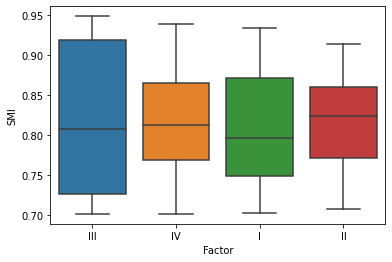

In [ ]:
sns.boxplot(data=xy, x='factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.show()

13- Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)

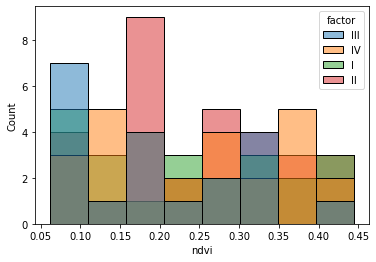

In [ ]:
xy.groupby('factor')
histo = sns.histplot(data=xy,x="ndvi", hue="factor")
histo

14- Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)

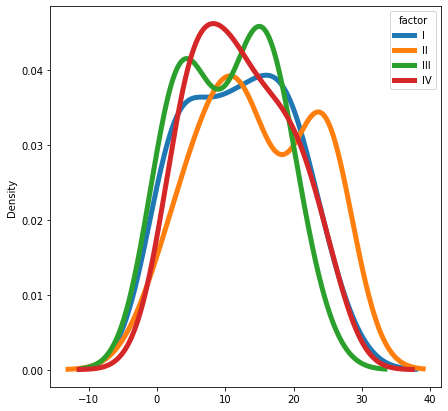

In [ ]:
DfLST=xy.pivot(columns='factor', values='lst') 

densi = DfLST.plot.density(figsize = (7, 7), 
                       linewidth = 5) 
densi

15- Construya una matriz de correlaciones de Pearson para las 5 variables

In [ ]:
dfMa=pd.DataFrame({'lat' : latitude, 'lon': longitude,  'lst':LST ,'smi': SMI,'ndvi':NDVI })
dfMa.corr()
corr= dfMa.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,lat,lon,lst,smi,ndvi
lat,1.000000,-0.192078,0.082715,0.001035,0.106097
lon,-0.192078,1.000000,-0.001686,-0.005628,0.089140
lst,0.082715,-0.001686,1.000000,0.453193,0.516654
smi,0.001035,-0.005628,0.453193,1.000000,0.480136
ndvi,0.106097,0.089140,0.516654,0.480136,1.000000


Realice un gráfico de correlaciones para las 5 variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f040cf1ad50>,
      dtype=object)

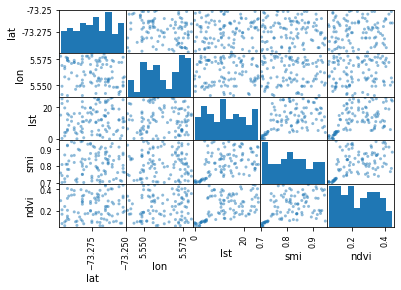

In [ ]:
pd.plotting.scatter_matrix(dfMa)

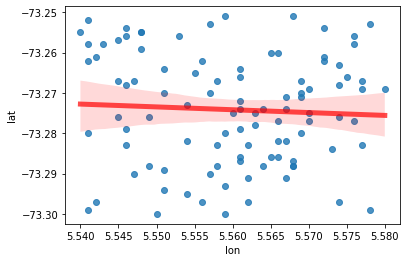

In [ ]:
sns.regplot(x=df6["lon"], y=df6["lat"], line_kws={"color":"r","alpha":0.7,"lw":5})

17- Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico.

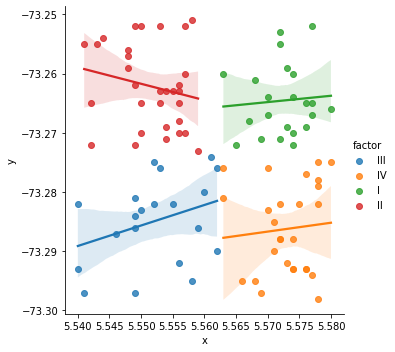

In [ ]:
correla = sns.lmplot(x="x", y="y", hue="factor", data=xy)
correla

18- Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST.

In [ ]:
y = df1['NDVI']
x = df1['LST'] 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     35.68
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.74e-08
Time:                        04:28:26   Log-Likelihood:                 94.441
No. Observations:                 100   AIC:                            -184.9
Df Residuals:                      98   BIC:                            -179.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1418      0.018      7.710      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



19- Ajuste un modelo de regresión multiple entre NDVI (respuesta) con LST y SMI

In [ ]:
y = xy['ndvi'] 
x = xy[{'lst',"smi"}] 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     25.33
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.41e-09
Time:                        04:28:29   Log-Likelihood:                 99.926
No. Observations:                 100   AIC:                            -193.9
Df Residuals:                      97   BIC:                            -186.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2148      0.108     -1.993      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



20- Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.

        x       y factor       smi      ndvi        lst
87  5.570 -73.264      I  0.883903  0.243363  23.276057
83  5.541 -73.297    III  0.743409  0.170746  22.295055
11  5.572 -73.271      I  0.716333  0.097161   2.685219
99  5.569 -73.297     IV  0.809154  0.211425  25.190116
59  5.574 -73.293     IV  0.920914  0.317501   5.346669
..    ...     ...    ...       ...       ...        ...
45  5.543 -73.255     II  0.842529  0.266863  11.860457
26  5.549 -73.284    III  0.894564  0.145037  16.104566
63  5.572 -73.288     IV  0.863839  0.350837  15.937050
29  5.577 -73.267      I  0.817397  0.341083   8.383422
3   5.563 -73.281     IV  0.702120  0.082395   0.815513

[80 rows x 6 columns]


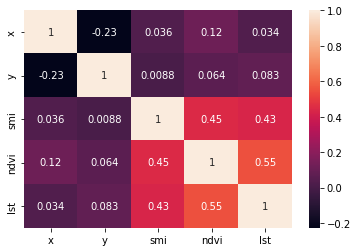

In [ ]:
muestra1 = xy.sample(80)
print(muestra1)
muestra1.corr()
mc= muestra1.corr ()
sns.heatmap(mc, annot = True)
plt.show()

21- Haga un gráfico 3D para las 3 variables ambientales

In [ ]:
D3 = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst')
D3.show()

22- Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante

In [ ]:
D3_2 = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'factor')
D3_2.show()

23- Investigue como se construye una matriz de distancias entre todos las coordenadas

In [ ]:
matriz = np.stack([xy['x'],xy['y']], axis=1)
matrizX2=distance_matrix(matriz, matriz)
print(matrizX2)

[[0.         0.00905539 0.00921954 ... 0.03544009 0.02624881 0.01118034]
 [0.00905539 0.         0.01486607 ... 0.02657066 0.01835756 0.01486607]
 [0.00921954 0.01486607 0.         ... 0.04070626 0.02701851 0.02      ]
 ...
 [0.03544009 0.02657066 0.04070626 ... 0.         0.02012461 0.03601389]
 [0.02624881 0.01835756 0.02701851 ... 0.02012461 0.         0.03301515]
 [0.01118034 0.01486607 0.02       ... 0.03601389 0.03301515 0.        ]]


24- Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias

(5.562050000000006, -73.27371999999986)


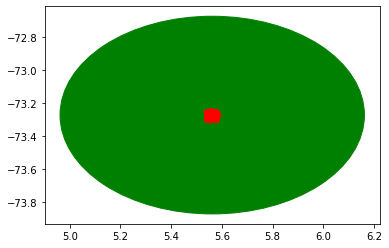

In [ ]:
coord_data= np.array(matriz)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide = centroid(coord_data)
print(centroide)
circle = plt.Circle((centroide), 0.6, color='g')
fig, ax = plt.subplots()
ax.add_patch(circle)
plt.plot(xy['x'],xy['y'],'ro')
plt.scatter(centroide[0],centroide[1],c="r")

25- Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana

(5.562050000000006, -73.27371999999986)


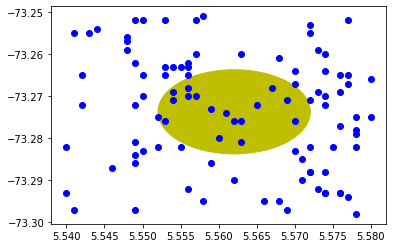

In [ ]:
centroide = centroid(matriz)
print(centroide)
circle = plt.Circle((centroide), 0.01, color='y')
fig, ax = plt.subplots()
ax.add_patch(circle)

plt.plot(xy['x'],xy['y'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

In [ ]:
des=xy.describe()
print(des)

                x           y         smi        ndvi         lst
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     5.562050  -73.273720    0.815940    0.235817   12.522543
std      0.011758    0.013267    0.073029    0.110464    7.599867
min      5.540000  -73.298000    0.701797    0.061499    0.001051
25%      5.552750  -73.283250    0.752882    0.133236    5.737619
50%      5.562000  -73.272000    0.814713    0.227884   11.898367
75%      5.573000  -73.263750    0.870687    0.331173   18.813169
max      5.580000  -73.251000    0.948712    0.444911   25.978947


26- Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construir un nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrantes.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
F1 = xy.loc[xy["factor"] == "I"]
F2 = xy.loc[xy["factor"] == "II"]
F3 = xy.loc[xy["factor"] == "III"]
F4 = xy.loc[xy["factor"] == "IV"]
f1=F1.sample(10)
f2=F2.sample(10)
f3=F3.sample(10)
f4=F4.sample(10)
dx=pd.merge(f1, f2,how='outer' )
dx2=pd.merge(dx, f3,how='outer' )
dx3=pd.merge(dx2, f4,how='outer' )



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols("smi ~ factor" ,data=dx3).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
factor    0.001320   3.0  0.069912  0.97563
Residual  0.226541  36.0       NaN      NaN


27- Use alguna librería que permita extraer los residuales del modelo y haga su histograma

0     0.068385
1     0.103572
2    -0.039539
3     0.060912
4    -0.104465
5    -0.013789
6    -0.108689
7    -0.021003
8    -0.017575
9     0.072190
10   -0.013289
11    0.019419
12   -0.118240
13   -0.022566
14    0.075811
15   -0.040600
16    0.087442
17    0.079853
18   -0.051013
19   -0.016818
20   -0.034677
21   -0.089756
22    0.081413
23    0.104705
24   -0.014580
25   -0.085925
26    0.132300
27   -0.107930
28    0.121946
29   -0.107495
30   -0.092724
31   -0.106060
32    0.026373
33    0.044222
34    0.112823
35   -0.020548
36   -0.066208
37    0.025225
38   -0.006221
39    0.083116
dtype: float64


(array([6., 3., 2., 6., 6., 3., 1., 6., 4., 3.]),
 array([-0.11823979, -0.09318584, -0.0681319 , -0.04307796, -0.01802401,
         0.00702993,  0.03208388,  0.05713782,  0.08219177,  0.10724571,
         0.13229966]),
 <a list of 10 Patch objects>)

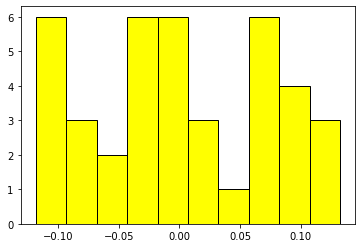

In [ ]:
waste= mod.resid
print(waste) 
histograma= plt.hist(waste, 
         color = "yellow", 
         ec= "black")
histograma

28- Utilice la prueba de Shapiro para probar normalidad en los residuales

In [ ]:

stat, p = shapiro(waste)
print('Estadísticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('La muestra se comporta de manera Gaussiana (no se rechaza H0)')
else:
	print('La muestra no se comporta de manera gaussiana (rechazar H0)')

Estadísticas=0.938, p=0.030
La muestra no se comporta de manera gaussiana (rechazar H0)
